<a href="https://colab.research.google.com/github/bharadwajvsd/Randomforest/blob/main/19911A3552_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediction of Gender with respective income classification 
    From the given dataset we can predict the gender.

**Description of Dataset**   

**age**:continuous.

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt:** continuous.

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num:** continuous.

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex:** Female, Male.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
#Importing Required libraries and Dataset
import pandas as pd
import matplotlib as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving income_evaluation.csv to income_evaluation.csv


In [3]:
import io
df= pd.read_csv(io.BytesIO(uploaded['income_evaluation.csv']))

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#Getting basic information about what are column names, is there any null values and knowing datatypes.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Gives the over all discription of dataset like: count, mean, standard deviation, minimum value and maximum value.  
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Gives all the column names.
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

#Feature Selection and Feature Engineering

In [8]:

df = df[['age', ' workclass', ' fnlwgt', ' education',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
        ' hours-per-week', ' native-country',
       ' income']]

In [9]:
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [10]:
df = df[['age', ' workclass',' education',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
        ' hours-per-week', ' native-country',
       ' income']]

In [11]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

#Dividing dataset into male dataset and female dataset

In [14]:
male_df = df[df[' sex'] == ' Male']

In [15]:
male_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [16]:
female_df = df[df[' sex'] == ' Female']

In [17]:
female_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
12,23,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32546,37,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K
32549,43,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,<=50K
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


#Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c2ae36490>]],
      dtype=object)

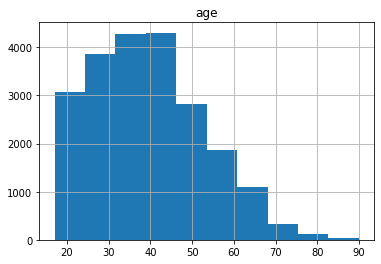

In [18]:
male_df.hist(column =['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


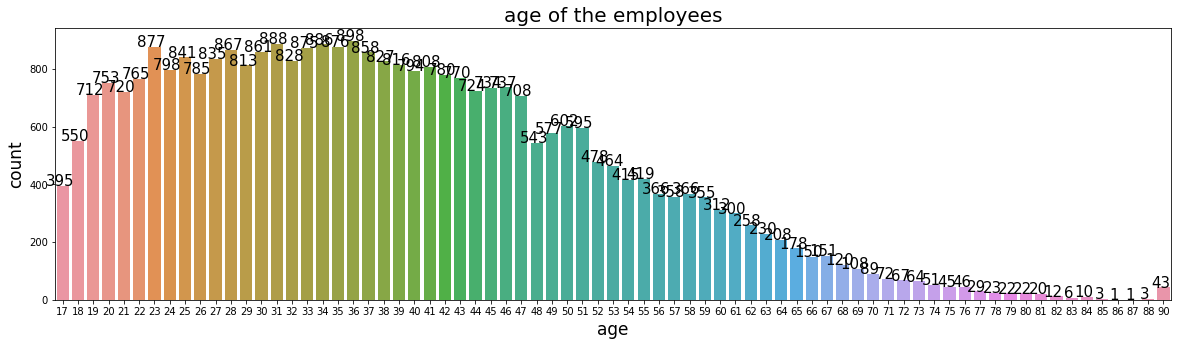

In [19]:
plt.figure(figsize = (20,5))
ax=sns.countplot(df["age"])
ax.set_title("age of the employees", fontsize = 20)
plt.xlabel("age",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

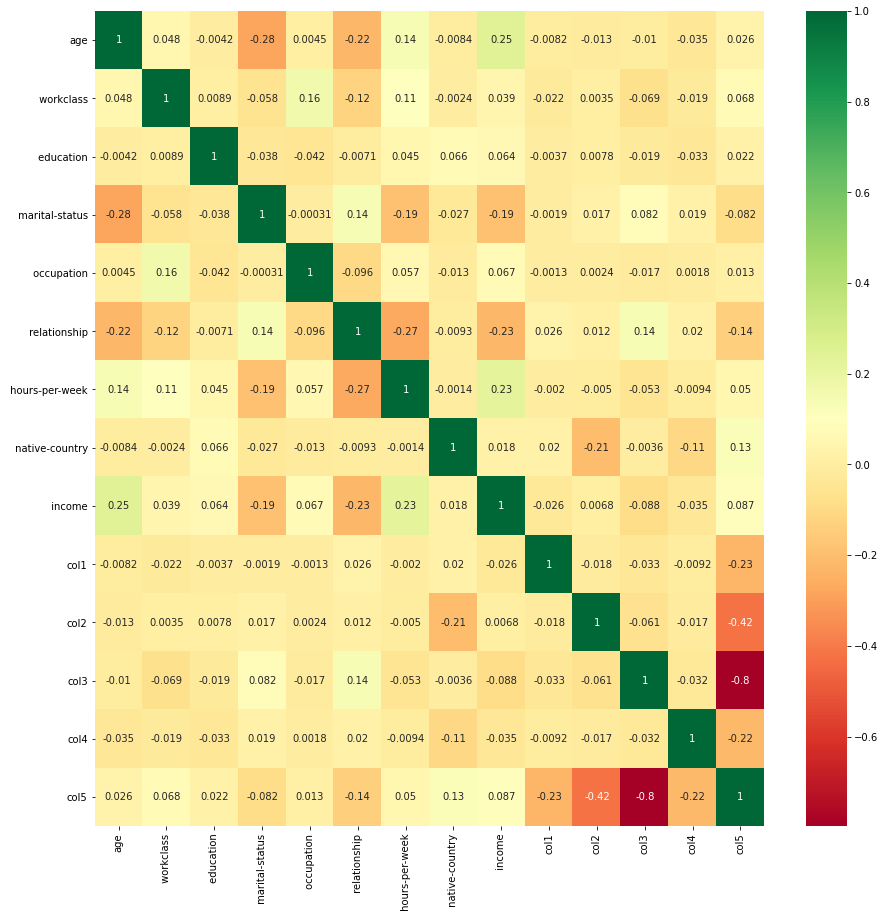

In [59]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Outlier Detection and Removing Outliers**

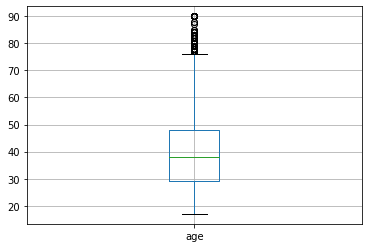

In [21]:
male_df.boxplot(column =['age'])

In [22]:
male_df = male_df[male_df['age']<73]

In [23]:

male_df.shape

(21519, 11)

In [24]:
male_df[' workclass'].value_counts()

 Private             14856
 Self-emp-not-inc     2073
 Local-gov            1244
 Self-emp-inc          954
 ?                     929
 State-gov             807
 Federal-gov           642
 Without-pay             9
 Never-worked            5
Name:  workclass, dtype: int64

In [25]:
male_df = male_df[male_df[' workclass'] != ' ?']

In [26]:
male_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,Masters,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,11,Taiwan,<=50K
32554,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
32555,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [27]:
male_df = male_df[:15000]

In [28]:
male_df.shape

(15000, 11)

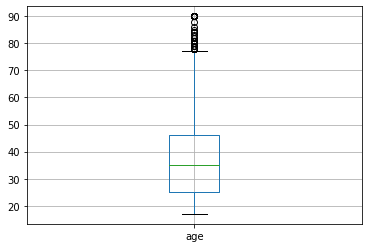

In [29]:
female_df.boxplot(column =['age'])

In [30]:
female_df = female_df[female_df['age']<73]

In [31]:
df = male_df.append(female_df)

In [32]:
df= df.reset_index()

In [33]:
df

,index,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...
25636,32546,37,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K
25637,32549,43,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,<=50K
25638,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
25639,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [34]:
#reindex after merging both dataframes
cols = list(df.columns)
cols.remove('index')
df = df[cols]

In [35]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
25636,37,Private,Assoc-acdm,Divorced,Tech-support,Not-in-family,White,Female,40,United-States,<=50K
25637,43,State-gov,Some-college,Divorced,Adm-clerical,Other-relative,White,Female,40,United-States,<=50K
25638,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
25639,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


#LabelEncoder :
is used for encoding text data into numarical data values.

In [36]:
le = LabelEncoder()
df[' workclass'] = le.fit_transform(df[' workclass'])
df[' education'] = le.fit_transform(df[' education'])
df[' marital-status'] = le.fit_transform(df[' marital-status'])
df[' relationship'] = le.fit_transform(df[' relationship'])
df[' occupation'] = le.fit_transform(df[' occupation'])
df[' native-country'] = le.fit_transform(df[' native-country'])
df[' income'] = le.fit_transform(df[' income'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [37]:
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,7,9,4,1,1,White,Male,40,39,0
1,50,6,9,2,4,0,White,Male,13,39,0
2,38,4,11,0,6,1,White,Male,40,39,0
3,53,4,1,2,6,0,Black,Male,40,39,0
4,52,6,11,2,4,0,White,Male,45,39,1
...,...,...,...,...,...,...,...,...,...,...,...
25636,37,4,7,0,13,1,White,Female,40,39,0
25637,43,7,15,0,1,2,White,Female,40,39,0
25638,27,4,7,2,13,5,White,Female,38,39,0
25639,58,4,11,6,1,4,White,Female,40,39,0


#OneHotEncoder

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
ohc = OneHotEncoder()

In [40]:
temp_df = pd.DataFrame(ohc.fit_transform(df[[' race']]).toarray())

In [41]:
temp_df = temp_df.reset_index()
cols = list(temp_df.columns)
cols.remove('index')
temp_df = temp_df[cols]

In [42]:
temp_df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
25636,0.0,0.0,0.0,0.0,1.0
25637,0.0,0.0,0.0,0.0,1.0
25638,0.0,0.0,0.0,0.0,1.0
25639,0.0,0.0,0.0,0.0,1.0


In [43]:
main_df = pd.concat([df, temp_df], ignore_index=True)

In [44]:
df['col1'] = temp_df[0]
df['col2'] = temp_df[1]
df['col3'] = temp_df[2]
df['col4'] = temp_df[3]
df['col5'] = temp_df[4]

In [45]:
df


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,col1,col2,col3,col4,col5
0,39,7,9,4,1,1,White,Male,40,39,0,0.0,0.0,0.0,0.0,1.0
1,50,6,9,2,4,0,White,Male,13,39,0,0.0,0.0,0.0,0.0,1.0
2,38,4,11,0,6,1,White,Male,40,39,0,0.0,0.0,0.0,0.0,1.0
3,53,4,1,2,6,0,Black,Male,40,39,0,0.0,0.0,1.0,0.0,0.0
4,52,6,11,2,4,0,White,Male,45,39,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25636,37,4,7,0,13,1,White,Female,40,39,0,0.0,0.0,0.0,0.0,1.0
25637,43,7,15,0,1,2,White,Female,40,39,0,0.0,0.0,0.0,0.0,1.0
25638,27,4,7,2,13,5,White,Female,38,39,0,0.0,0.0,0.0,0.0,1.0
25639,58,4,11,6,1,4,White,Female,40,39,0,0.0,0.0,0.0,0.0,1.0


In [46]:
df.columns

Index(['age', ' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' hours-per-week', ' native-country',
       ' income', 'col1', 'col2', 'col3', 'col4', 'col5'],
      dtype='object')

# Dividing Data values into Features and Label

In [47]:
X = df[['age', ' workclass', ' education', ' marital-status', ' occupation',
       ' relationship',' hours-per-week', ' native-country',
       ' income', 'col1', 'col2', 'col3', 'col4', 'col5']].values 
Y = df[[' sex']].values

#Dividing the Dataset into Training and Testing
Training Data is 70% and Testing Data is 30% of Total data. 

In [48]:
from  sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [50]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((19230, 14), (6411, 14), (19230, 1), (6411, 1))

#Importing ML Model(RandomForestClassifier)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier()

#Training the Model

In [53]:
rfc.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
Y_predict = rfc.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

#Finding Accuracy_score


In [56]:
accuracy_score(Y_test, Y_predict)

0.8415223834035251

In [57]:
#finding male or female with own data inputs.
rfc.predict([[50,7,9,0,1,1,50,30,0,0,0,0,0,1]])
#'age', ' workclass', ' education', ' marital-status', ' occupation',
#' relationship',' hours-per-week', ' native-country',
#' income', 'col1', 'col2', 'col3', 'col4', 'col5'

array([' Female'], dtype=object)

#Final words
**I have choosen a classifier over a Regressor because at last i wanted to predict a male or female (gender) as output. so, over regressor a classifier would be a better option. in classification, Random forest gives a good of efficiency for this type of dataset. Random Forest is an Ensemble-Tree based algorithm. Random Forest use set of decision tree from randomly selected set of training set in order to decide the final outcome. Using tree based model we can get a valid amount of accuracy.**